In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
maternal_health_data = pd.read_csv('Maternal Health Risk Data Set.csv')

In [5]:
maternal_health_data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [6]:
maternal_health_data.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [7]:
y=maternal_health_data.iloc[:,6].values

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
T_y  = le.fit_transform(y)

y_unique = np.unique(y)
T_yunique = np.unique(T_y)
y_encode = dict(zip(y_unique, T_yunique))
print(y_encode)

{'high risk': 0, 'low risk': 1, 'mid risk': 2}


In [9]:
tr_dict = {'low risk':0,
          'mid risk':1,
          'high risk':2}
maternal_health_data['RiskLevel'] = maternal_health_data['RiskLevel'].map(tr_dict)

maternal_health_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


In [10]:
maternal_health_data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


In [11]:
maternal_health_data.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2
1013,32,120,65,6.0,101.0,76,1


In [12]:
maternal_health_data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,0.867850
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.807353
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


In [13]:
maternal_health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


In [14]:
maternal_health_data.shape

(1014, 7)

In [15]:
maternal_health_data['RiskLevel'].value_counts()

0    406
1    336
2    272
Name: RiskLevel, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


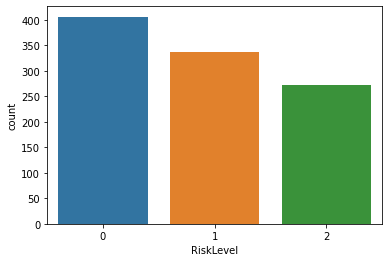

In [16]:
sns.countplot(maternal_health_data['RiskLevel'])

In [17]:
x = maternal_health_data.drop('RiskLevel',axis=1)
y = maternal_health_data['RiskLevel']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [19]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
model = tf.keras.models.Sequential()

In [21]:
model.add(tf.keras.layers.Dense(8,activation='relu',input_shape=(6,)))
model.add(tf.keras.layers.Dense(3,activation='softmax'))

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 56        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(x_train, y_train, \
                    batch_size = 8, epochs = 50, \
                    verbose=2, \
                    validation_split=0.2)

Epoch 1/50
71/71 - 3s - loss: 1.1988 - accuracy: 0.3192 - val_loss: 1.1050 - val_accuracy: 0.4085 - 3s/epoch - 40ms/step
Epoch 2/50
71/71 - 0s - loss: 1.0567 - accuracy: 0.4162 - val_loss: 1.0198 - val_accuracy: 0.4930 - 177ms/epoch - 2ms/step
Epoch 3/50
71/71 - 0s - loss: 0.9779 - accuracy: 0.5397 - val_loss: 0.9676 - val_accuracy: 0.5493 - 203ms/epoch - 3ms/step
Epoch 4/50
71/71 - 0s - loss: 0.9297 - accuracy: 0.5732 - val_loss: 0.9336 - val_accuracy: 0.5563 - 182ms/epoch - 3ms/step
Epoch 5/50
71/71 - 0s - loss: 0.8971 - accuracy: 0.5767 - val_loss: 0.9083 - val_accuracy: 0.5634 - 181ms/epoch - 3ms/step
Epoch 6/50
71/71 - 0s - loss: 0.8722 - accuracy: 0.6014 - val_loss: 0.8882 - val_accuracy: 0.5845 - 169ms/epoch - 2ms/step
Epoch 7/50
71/71 - 0s - loss: 0.8522 - accuracy: 0.6120 - val_loss: 0.8728 - val_accuracy: 0.5986 - 167ms/epoch - 2ms/step
Epoch 8/50
71/71 - 0s - loss: 0.8359 - accuracy: 0.6279 - val_loss: 0.8588 - val_accuracy: 0.6197 - 171ms/epoch - 2ms/step
Epoch 9/50
71/71 -

In [25]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

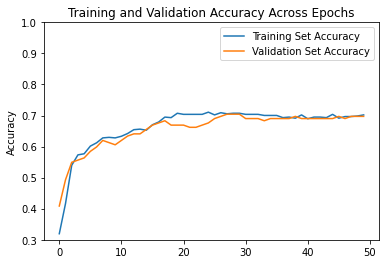

In [26]:
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [28]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

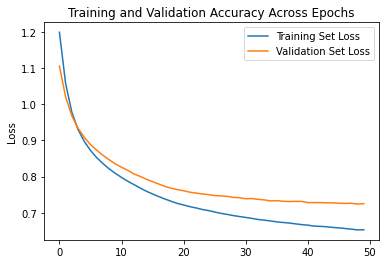

In [29]:
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=1)

10/10 [==============================] - 0s 2ms/step


In [32]:
confusion_matrix = confusion_matrix(y_test,y_pred)

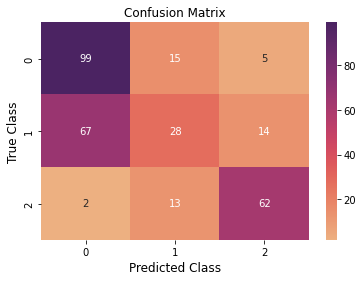

In [34]:
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.83      0.69       119
           1       0.50      0.26      0.34       109
           2       0.77      0.81      0.78        77

    accuracy                           0.62       305
   macro avg       0.62      0.63      0.60       305
weighted avg       0.60      0.62      0.59       305

